In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [6]:
#baseline_K_val = [1, 4, 7, 10, 13]
#baseline_K_val = [1, 4, 7]
baseline_K_val = [10, 13]
SUBJECT = "Minjeong"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject=f"{SUBJECT}")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_M.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/14 - Session Exp_2025-08-01-v1/E9AD0E7DCC2B/
(8583, 4, 14, 1) (8583,) (87, 4, 14, 1) (87,)
Dataset 2/14 - Session Exp_2025-08-01-v2/E9AD0E7DCC2B/
second (8583, 4, 14, 1) (8583,) (87, 4, 14, 1) (87,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 89.74%
Maximum validation accuracy : 86.21%
Accuracy of test dataset using model V0: 86.2069%
Dataset 3/14 - Session Exp_2025-08-02-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.4827%
Dataset 4/14 - Session Exp_2025-08-02-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 88.1992%
Dataset 5/14 - Session Exp_2025-08-09-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 88.4954%
Dataset 6/14 - Session Exp_2025-08-09-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 88.4442%
Dataset 7/14 - Session Exp_2025-08-10-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 87.5043%
Dataset 8/14 - Session Exp_2025-08-10-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 88.7022%
Dataset 9/14 - Session Exp_2025-08-11-v1/E9AD0

In [7]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '10', '13']
#baseline_K = ['1', '4', '7']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_M.csv')

In [8]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_{SUBJECT}/Train_Test_per_sessions.csv', index=False)


Dataset 1/14 - Session Exp_2025-08-01-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.1%
Maximum validation accuracy : 88.21%

Dataset 2/14 - Session Exp_2025-08-01-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.98%
Maximum validation accuracy : 87.1%

Dataset 3/14 - Session Exp_2025-08-02-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.59%
Maximum validation accuracy : 88.62%

Dataset 4/14 - Session Exp_2025-08-02-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 90.11%
Maximum validation accuracy : 89.6%

Dataset 5/14 - Session Exp_2025-08-09-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 89.68%
Maximum validation a

In [9]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 35.32%
Average of acc using previous test data after training: 87.52%
Average of acc using current test data after training: 88.80%
K-1: 87.25% | Target: 88.85
K-4: 89.69% | Target: 88.97
K-7: 90.46% | Target: 88.66


In [12]:
np.array(baseline_result['Info'])

array(['Stand (8/1)', 'Sit_chair (8/1)', 'Stand (8/2)', 'Sit_chair (8/2)',
       'Stand (8/9)', 'Sit_chair (8/9)', 'Stand (8/10)',
       'Sit_chair (8/10)', 'Stand (8/11)', 'Sit_chair (8/11)',
       'Stand (8/12)', 'Sit_chair (8/12)', 'Stand (8/13)',
       'Sit_chair (8/13)'], dtype=object)

In [10]:
Trained_acc_all

[0.882122278213501,
 0.8710275888442993,
 0.8861581087112427,
 0.8959925770759583,
 0.8969907164573669,
 0.898912787437439,
 0.895297646522522,
 0.8834298849105835,
 0.8637943267822266,
 0.8794144988059998,
 0.8983089923858643,
 0.8875986933708191,
 0.885800302028656,
 0.9077208638191223]

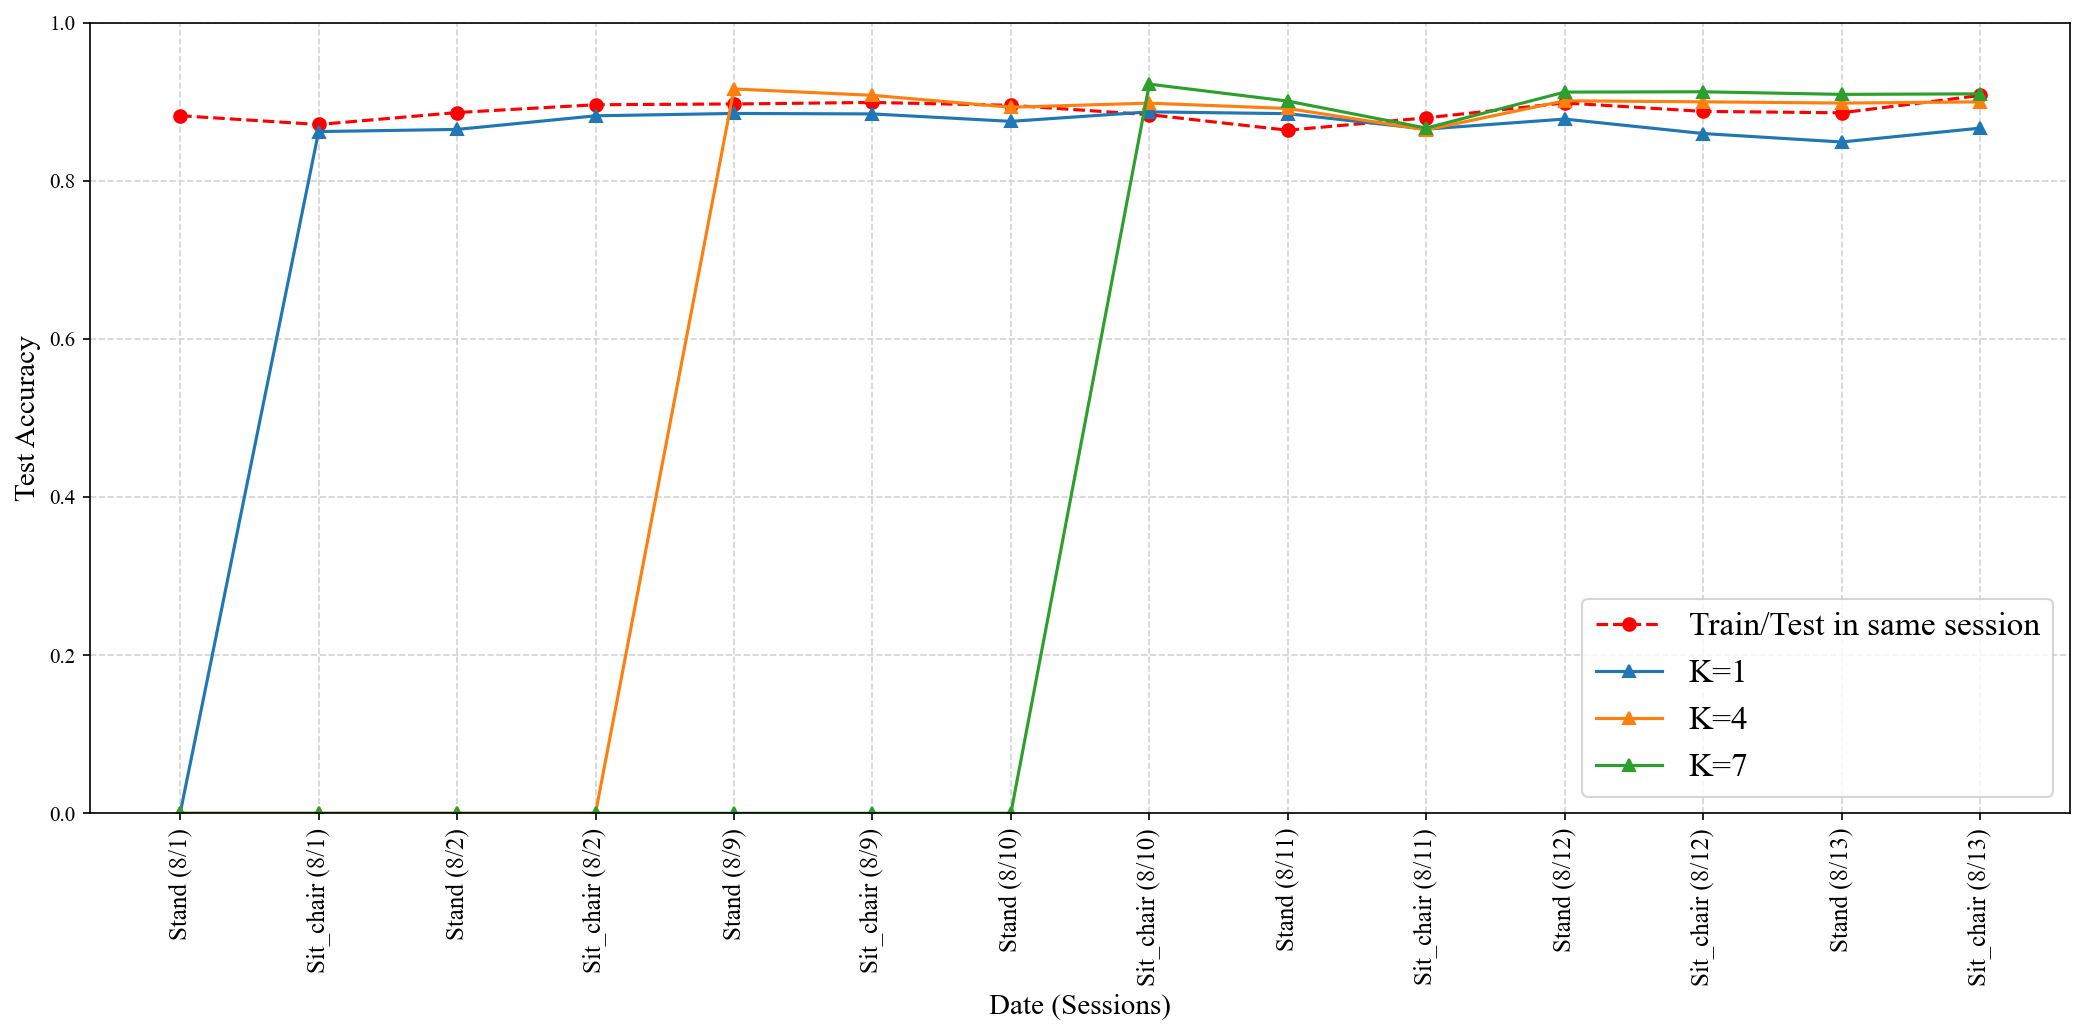

In [13]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.882122278213501, 0.8710275888442993, 0.8861581087112427, 0.8959925770759583, 0.8969907164573669, 0.898912787437439, 0.895297646522522, 0.8834298849105835, 0.8637943267822266, 0.8794144988059998, 0.8983089923858643, 0.8875986933708191, 0.885800302028656, 0.9077208638191223]

X_labels = ['Stand (8/1)', 'Sit_chair (8/1)', 'Stand (8/2)', 'Sit_chair (8/2)', 'Stand (8/9)', 'Sit_chair (8/9)', 'Stand (8/10)', 'Sit_chair (8/10)', 'Stand (8/11)', 'Sit_chair (8/11)', 'Stand (8/12)', 'Sit_chair (8/12)', 'Stand (8/13)', 'Sit_chair (8/13)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored, c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels, baseline_result['Accuracy'] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1, loc='lower right')
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()